In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgn
import cv2

In [2]:
img = plt.imread('images/MahomesPassGray.tiff')
img = img.astype(float)
filtro = plt.imread('images/Ball.tiff')
filtro = filtro.astype(float)

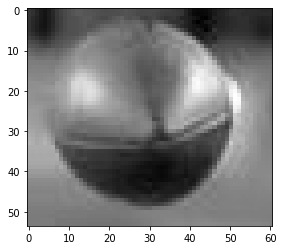

In [3]:
plt.imshow(filtro, cmap ="gray")

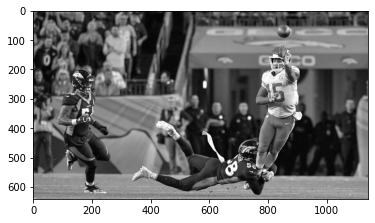

In [4]:
plt.imshow(img, cmap ="gray")

In [5]:

num_linhas, num_cols = filtro.shape

def gera_gamma(img, gamma):
    num_lin, num_col = img.shape
    img_mudada = np.zeros([num_lin, num_col], dtype = np.uint8)
    img_mudada = 255*((img/255)**gamma)
#     for row in range (num_lin):
#         for col in range(num_col):
#             if img[row, col]**gamma < 256:
#                 img_mudada[row, col] = img[row, col]**gamma
#             else:
#                 img_mudada[row, col] = 255
                
    return img_mudada

In [6]:
#Codigo da diferença quadratica usando convolução

def diferenca_quadratica_corr(img, obj):
    w = np.ones(obj.shape)
    imgOw = sgn.correlate(img**2, w, mode='same')
    imgOobj = sgn.correlate(img, obj, mode='same')
    
    img_diff = imgOw + np.sum(obj**2) - 2*imgOobj
    
    return img_diff

In [7]:
def encontra_minimo(img):
    '''Encontra posição do valor mínimo de img'''
    
    num_rows, num_cols = img.shape
    menor_valor = img[0,0]
    indice_menor_valor = (0, 0)
    for row in range(num_rows):
        for col in range(num_cols):
            valor = img[row,col]
            if valor<menor_valor:
                menor_valor = valor
                indice_menor_valor = (row, col)
            
    return menor_valor, indice_menor_valor

In [8]:
def draw_rectangle(img_g, center, size):
    '''Desenha um quadrado em uma cópia do array img_g. center indica o centro do quadrado
       e size o tamanho.'''
    
    half_num_rows_obj = size[0]//2
    half_num_cols_obj = size[1]//2

    img_rectangle = img_g.copy()
    pt1 = (center[1]-half_num_cols_obj, center[0]-half_num_rows_obj)
    pt2 = (center[1]+half_num_cols_obj, center[0]+half_num_rows_obj)
    cv2.rectangle(img_rectangle, pt1=pt1, pt2=pt2, color=255, thickness=3)
    
    return img_rectangle

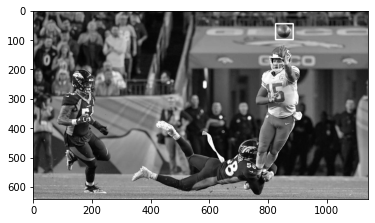

In [9]:
# Procurando a menor diferença entre todas as imagens com intensidades alteradas

dark = np.linspace(0,1,10,endpoint=False)
light = np.linspace(1.1,2,10,endpoint=False)

img_diff = diferenca_quadratica_corr(img, filtro)
menor_valor, indice = encontra_minimo(img_diff)

for x in dark:
    img_diff = diferenca_quadratica_corr(img, gera_gamma(filtro, x))
    menor_valor_outraimg, indice_outraimg = encontra_minimo(img_diff)
    if(menor_valor_outraimg < menor_valor):
        menor_valor = menor_valor_outraimg
        indice = indice_outraimg
    
for x in light:
    img_diff = diferenca_quadratica_corr(img, gera_gamma(filtro, x))
    menor_valor_outraimg, indice_outraimg = encontra_minimo(img_diff)
    if(menor_valor_outraimg < menor_valor):
        menor_valor = menor_valor_outraimg
        indice = indice_outraimg
        
img_square = draw_rectangle(img, indice, filtro.shape)
plt.imshow(img_square, 'gray')